# Driving Distance relative to greens in regulation

This is an analysis of average driving distances and how they compare to the amount of greens hit in regulation.

Problem:
With the lengths of average driving distances rising in golf, I wanted to do a analysis of how those distances really help players reach the green in regulation.

Data:
The data being used is from pga.com, and contains tables of all active players on the PGA Tour. I will compare the top average drives of each player relative to the top green in regulation percentage using a linear model to see if we can predict if a longer driving average produces a higher green in regulation percentage.

In [2]:
import numpy as np
import pandas as pd
driving_data = pd.read_csv('AvgDrives.csv', header=None, encoding="latin1")
green_reg_data = pd.read_csv('GreensInRegulation.csv', header=None, encoding="latin1")

Check for missing values inside of the pandas DataFrames

In [3]:
driving_data.isnull().sum()

0    0
1    1
2    1
3    1
4    1
5    1
6    1
dtype: int64

In [4]:
green_reg_data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

## Get our training and test sets 

Now that we know we don't have any missing values, we don't have to perform any imputer functions. Now we split the datasets, and select the driving distance column and the greens in regulation percentage column for X and y.

We will also want to sort the DataFrame so that each player matches their driving distance and green-in-regulation percentage.

In [5]:
driving_data = driving_data.sort_values(by=[2])
green_reg_data = green_reg_data.sort_values(by=[2])

In [16]:
driving_data = driving_data.dropna()
driving_data

,0,1,2,3,4,5,6
0,123,122.0,Aaron Baddeley,40.0,293.2,23455.0,80.0
1,41,40.0,Aaron Wise,46.0,302.4,27819.0,92.0
2,146,143.0,Abraham Ancer,46.0,290.9,26765.0,92.0
3,166,166.0,Adam Hadwin,43.0,288.9,16178.0,56.0
4,44,41.0,Adam Schenk,48.0,302.3,29022.0,96.0
5,18,20.0,Adam Scott,27.0,308.1,11706.0,38.0
6,174,171.0,Alex Cejka,33.0,287.2,18958.0,66.0
7,45,47.0,Alex Noren,35.0,302.2,14504.0,48.0
8,118,122.0,Andrew Landry,29.0,293.5,17025.0,58.0
9,106,100.0,Andrew Putnam,41.0,294.3,24135.0,82.0


In [7]:
green_reg_data

,0,1,2,3,4,5,6,7
0,186,195,Aaron Baddeley,40,60.97,439,720,-0.25
1,94,94,Aaron Wise,46,66.43,550,828,-0.30
2,151,165,Abraham Ancer,46,63.89,529,828,-0.26
3,31,28,Adam Hadwin,43,69.58,501,720,-0.26
4,77,79,Adam Schenk,48,67.36,582,864,-0.23
5,23,18,Adam Scott,27,70.16,341,486,-0.21
6,160,160,Alex Cejka,33,63.30,376,594,-0.26
7,48,41,Alex Noren,35,68.85,347,504,-0.31
8,115,109,Andrew Landry,29,65.52,342,522,-0.27
9,37,44,Andrew Putnam,41,69.38,512,738,-0.24


In [17]:
X = driving_data.iloc[:,4:5].values
y = green_reg_data.iloc[:,4].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

## Predict the green-in-regulation percentage and plot the result

After splitting the data into our training and test sets, we can fit a linear model to the data to start seeing if we can predict the outcomes of the green-in-regulation percentage based on a player's average driving distance.

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
green_predict = regressor.predict(X_test)

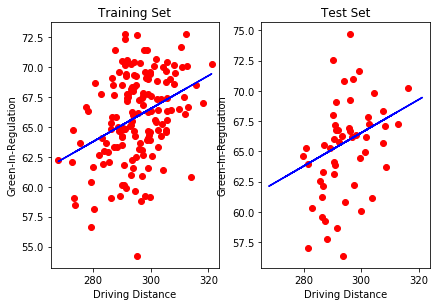

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

axes[0].scatter(X_train, y_train, color = 'red')
axes[0].plot(X_train, regressor.predict(X_train), color = 'blue')
axes[0].set_title('Training Set')
axes[0].set_xlabel('Driving Distance')
axes[0].set_ylabel('Green-In-Regulation')

axes[1].scatter(X_test, y_test, color = 'red')
axes[1].plot(X_train, regressor.predict(X_train), color = 'blue')
axes[1].set_title('Test Set')
axes[1].set_xlabel('Driving Distance')
axes[1].set_ylabel('Green-In-Regulation')

From our models, it looks like that with increased driving distance, it does increase the chances of a player hitting the green in regulation. You can also see from the models that this isn't always the case with quite a few players as well.

## Decision Tree Analysis

Let's see if we can use a Decision Tree model to try and predict how many rounds a player has played based on how many total drives they've had. First we will import the neccesary models.

In [23]:
X = driving_data.iloc[:,4:5].values
y = driving_data.iloc[:,6].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [25]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]

             precision    recall  f1-score   support

        8.0       0.00      0.00      0.00         1
       20.0       0.00      0.00      0.00         0
       24.0       0.00      0.00      0.00         0
       28.0       0.00      0.00      0.00         1
       30.0       0.00      0.00      0.00         1
       32.0       0.00      0.00      0.00         0
       34.0       0.00      0.00      0.00         0
       36.0       0.00      0.00      0.00         0
       38.0       0.00      0.00      0.00         0
       40.0       0.00      0.00      0.00         2
       42.0       0.00      0.00      0.00         1
       44.0       0.00      0.00      0.00         2
       46.0       0.00      0.00      0.00         1
       48.0       0.00      0.00      0.00         1
       50.0       0.00      0.00      0.00         0
       52.0       0.00

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Let's try and see if using a Random Forest model will help us acheive a little more accuracy on our metrics.

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
# We will use 300 because our dataset is a little larger

In [28]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [29]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


             precision    recall  f1-score   support

        8.0       0.00      0.00      0.00         1
       24.0       0.00      0.00      0.00         0
       28.0       0.00      0.00      0.00         1
       30.0       0.00      0.00      0.00         1
       32.0       0.00      0.00      0.00         0
       36.0       0.00      0.00      0.00         0
       38.0       0.00      0.00      0.00         0
       40.0       0.00      0.00      0.00         2
       42.0       0.00      0.00      0.00         1
       44.0       0.00      0.00      0.00         2
       46.0       0.00      0.00      0.00         1
       48.0       0.00      0.00      0.00         1
       50.0       0.00      0.00      0.00         0
       52.0       0.00      0.00      0.00         5
       54.0       0.00      0.00      0.00         3
       56.0       0.0

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Let's see the distribution of the data, to analyze why our precision and recall numbers are low. We will be using seaborn to do this.

In [33]:
import seaborn as sns
%matplotlib inline

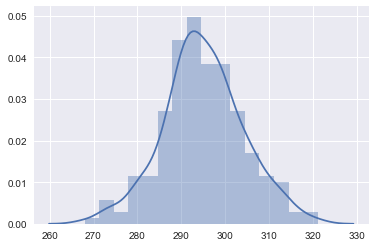

In [34]:
driving_avg = driving_data.iloc[:,4:5].values
sns.distplot(driving_avg)